In [35]:
import os
import pandas as pd
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
seaborn.set()
plt.style.use('seaborn-paper') 

In [54]:
models = ['clip-fa_lstm_3_bidirectional',
          'clip-fa_bahdanau_attn_lstm',
          'clip-fa_12heads_3_transformer',]

labels = {'clip-fa_lstm_3_bidirectional':'CLIPfa_3BiLSTM',
          'clip-fa_bahdanau_attn_lstm': 'CLIPfa_BahdanauLSTM',
          'clip-fa_12heads_3_transformer':'CLIPfa_3Transformer'}

errors = {}
for m in models:
    df = pd.read_excel(os.path.join(r'..\result',f'model_prediction_TEST_{m}.xlsx'))
    errors[labels[m]] = dict(df.groupby(['error_type']).size())

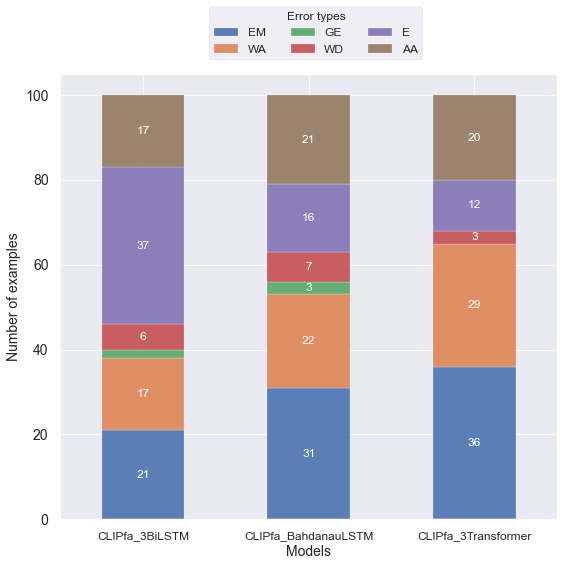

In [91]:
plotdata = pd.DataFrame(errors).transpose()[["EM", "WA", "GE", "WD", "E","AA"]]

# , figsize=(8,6)
ax = plotdata.plot(kind="bar", stacked=True, alpha=0.9, figsize=(8, 8))

for c in ax.containers:
    labels = [int(v.get_height()) if v.get_height() > 2 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='w')
    
plt.legend(bbox_to_anchor=(0.3, 1.15), loc='upper left', borderaxespad=0., ncol=3, title="Error types", fontsize =12)
plt.yticks(fontsize=14)
plt.xticks(rotation= 'horizontal', fontsize=12)

plt.ylabel('Number of examples', fontsize=14)
plt.xlabel('Models', fontsize=14)

plt.tight_layout()
plt.savefig('error_parsvqa.png', bbox_inches="tight", dpi=300)

plt.show()

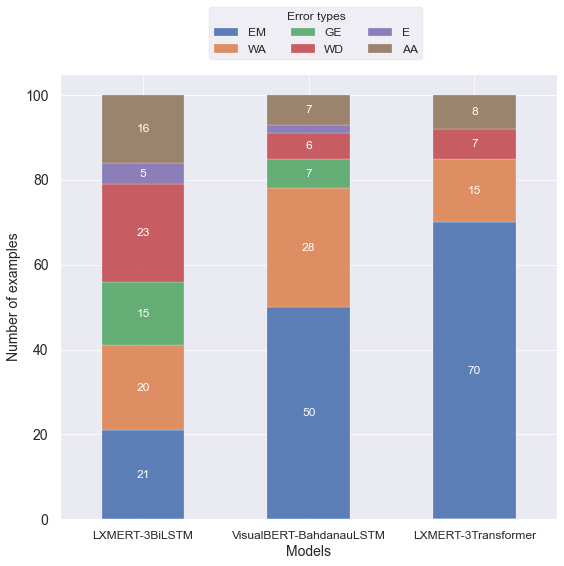

In [92]:
plotdata = pd.DataFrame({
    "EM":[21, 50, 70],
    "WA":[20, 28, 15],
    "GE":[15, 7, 0],
    "WD":[23, 6, 7],
    "E":[5, 2, 0],
    "AA":[16, 7, 8],
    }, 
    index=["LXMERT-3BiLSTM", "VisualBERT-BahdanauLSTM", "LXMERT-3Transformer"]
)

# , figsize=(8,6)
ax = plotdata.plot(kind="bar", stacked=True, alpha=0.9, figsize=(8, 8))

for c in ax.containers:
    labels = [int(v.get_height()) if v.get_height() > 2 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='w')
    
plt.legend(bbox_to_anchor=(0.3, 1.15), loc='upper left', borderaxespad=0., ncol=3, title="Error types", fontsize =12)

# the_table = plt.table(cellText=[['75%'], ['71%'], ['85%']],
#                       rowLabels=["LXMERT-3BiLSTM", "VisualBERT-BahdanauLSTM", "LXMERT-3Transformer"],
#                       colLabels=['VQA Accuracy'],
#                       cellLoc = 'center', rowLoc = 'center',
#                       loc='upper left', bbox=[0.371, 1, 0.2, 0.12], fontsize =16)

plt.yticks(fontsize=14)
plt.xticks(rotation= 'horizontal', fontsize=12)

plt.ylabel('Number of examples', fontsize=14)
plt.xlabel('Models', fontsize=14)

plt.tight_layout()
plt.savefig('error_fsvqa.png', bbox_inches="tight", dpi=300)

plt.show()